# 네이버 블로그 크롤링 - 

In [31]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from urllib.parse import quote

In [32]:
chromedriver = '/Users/sku11/Downloads/chromedriver.exe'
driver = webdriver.Chrome(chromedriver)


In [33]:
base_url = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query='
url = base_url + quote('아이폰13')
driver.get(url)

# 페이지를 아래로 내려서 더 많은 정보 확보

In [34]:
#blog
from selenium.webdriver.common.keys import Keys

body = driver.find_element_by_tag_name('body')
for i in range(35):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)

In [35]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')


In [37]:
lis = soup.select('li.bx._svp_item')
len(lis)


74

In [38]:
li = lis[0]
title = li.select_one('a.api_txt_lines.total_tit').get_text()
content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
date = li.select_one('.sub_time.sub_txt').get_text()
title, content, date

('아이폰13 애플페이 지원 무산 확정',
 'ㅎ 스펙 자체는 나쁘지 않겠지만 솔직히 지문인식도, 아이폰13 애플페이도 지원하지 않으면 그냥 기존의 아이폰12를 사용하는 게 더 낫지 않나 싶어요 아이폰12 상위 모델도 충분히 스펙 좋고요 ... 그래도 여러분들...',
 '6일 전')

In [41]:
title_list, content_list, date_list = [], [], []
for li in lis:
    #광고 삭제
    try:
        adv = li.select_one('a.link_ad').get_text()
        if adv.strip() == '광고':
            continue
    except:
        title = li.select_one('a.api_txt_lines.total_tit').get_text()
        content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
        date = li.select_one('.sub_time.sub_txt').get_text()
        title_list.append(title)
        content_list.append(content)
        date_list.append(date)

In [42]:
df = pd.DataFrame({
   'title' : title_list, 'content' : content_list, 'date':date_list

})

In [43]:
df.head()

,title,content,date
0,아이폰13 애플페이 지원 무산 확정,"ㅎ 스펙 자체는 나쁘지 않겠지만 솔직히 지문인식도, 아이폰13 애플페이도 지원하지 ...",6일 전
1,아이폰13 출시일 스펙 정리,올 가을 애플의 아이폰13 시리즈가 신제품 공개행사를 통해 전격 공개될 예정인데요 ...,5일 전
2,아이폰13 스펙 및 기능 미리보기!,"스크린샷에 따르면 아이폰13 시리즈는 모두 9월 말에 출시가 되며, 아이폰과 함께 ...",2일 전
3,아이폰13 출시일 이제 곧이네요. 바꿔야 하나?,서양에선 13을 기피하는 문화가 있습니다. 그래서 처음 루머가 떠돌기 시작했을 때부...,6일 전
4,"이제는 아이폰13 사전예약, 최근 소식까지!",이유가 무엇이든 간에 모바일 시장에 때아닌 호황이 찾아온 만큼 바로 다음 타자인 아...,4일 전


In [47]:
df.to_csv('iphone13.txt')

In [62]:
from wordcloud import WordCloud
from PIL import Image
from konlpy.tag import Okt
okt = Okt()

In [82]:
tokens = okt.nouns(text)
tokens[:10]

['아이폰', '애플', '페이', '지원', '무산', '확정', '스펙', '자체', '인식', '아이폰']

In [83]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [87]:
#한글폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
mpl.rcParams['axes.unicode_minus'] = False


In [88]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sku11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sku11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

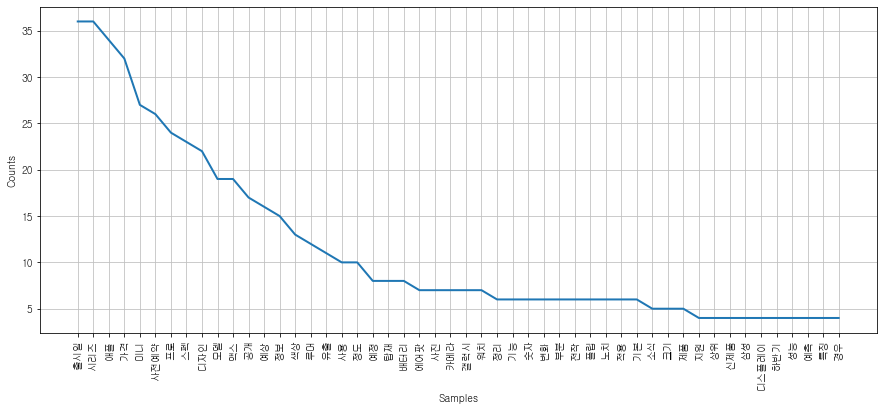

In [94]:
gift = nltk.Text(new_tokens, name ='아이폰13')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [90]:
stoptext = """전 것 이번 더 이 및 외 수 또한 이제 계 요 현재 대한 종 바로 관련 그냥 곳 의 끗 때 저 를 종 때문 다음  등 중 사람 올해 
여러분 아이폰 지금 최근 최신 역대 그 폰 계 역시 과연 제 은 이야기 출시
"""

#찍어보고 계속 스탑워드 추가 하여 정제함

In [92]:
stop_words =  stoptext.split()
#stop_words

In [93]:
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['애플', '페이', '지원', '무산', '확정', '스펙', '자체', '인식', '애플', '페이도']

In [97]:
data = gift.vocab().most_common(300)
gift.vocab().most_common(300)
path = "C:/Windows/Fonts/NGULIM.TTF"
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

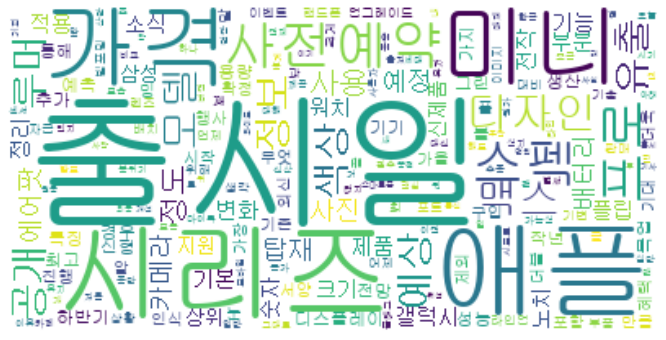

In [98]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#그림에 표시하기

In [104]:
maskfile = "C:/workspace/DataAnalysis/07.NLP/apple.png"
mask = np.array(Image.open(maskfile))


In [105]:

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [106]:
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white', mask=mask, ).generate_from_frequencies(dict(data))

default_color = wc.to_array

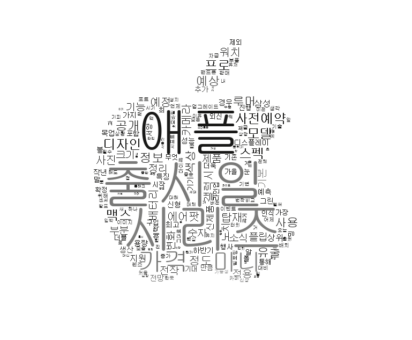

In [107]:
plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()